# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [61]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [62]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep = ';')

In [63]:
# verificando dados discrepantes no campo Valor

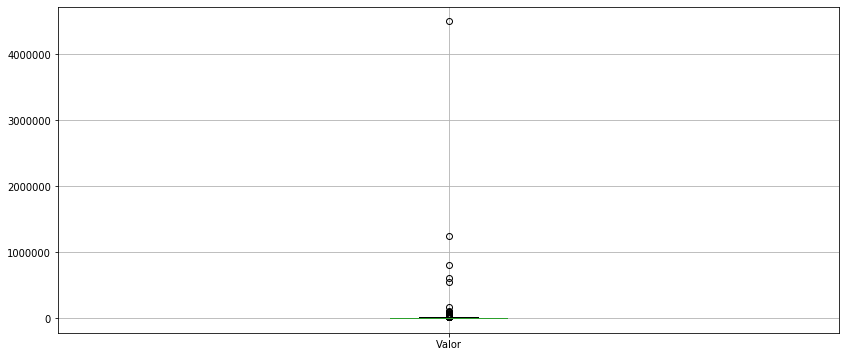

In [64]:
dados.boxplot(['Valor'])

In [65]:
dados[dados['Valor'] >= 500000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [66]:
# padrão estatístico para definir os registros com desvio de valor
Q1 = dados.Valor.quantile(.25)
Q3 = dados.Valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ


In [67]:
# filtra casos apenas dentro dos limites de desvio
selecao = (dados.Valor >= limite_inferior) & (dados.Valor <= limite_superior)
dados_new = dados[selecao]

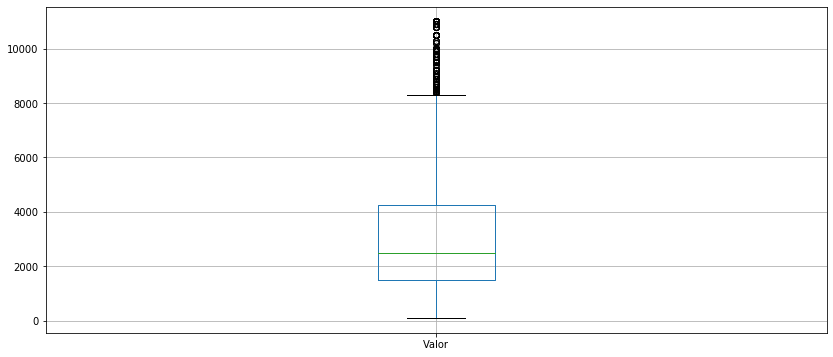

In [68]:
dados_new.boxplot(['Valor'])

In [69]:
## Classificando Imóveis de baixo e alto padrão de acordo com o valor

In [70]:
dados['Padrão'] = dados['Valor'].apply(lambda x: 'Alto' if x >= 10000 else ('Médio' if x > 5000 else 'Padrão'))
    

In [71]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado,Padrão
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento,Padrão
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa,Médio
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento,Padrão
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento,Padrão
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento,Padrão
...,...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento,Padrão
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento,Padrão
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento,Padrão
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento,Padrão


In [72]:
# historigram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023738FFB1C8>]],
      dtype=object)

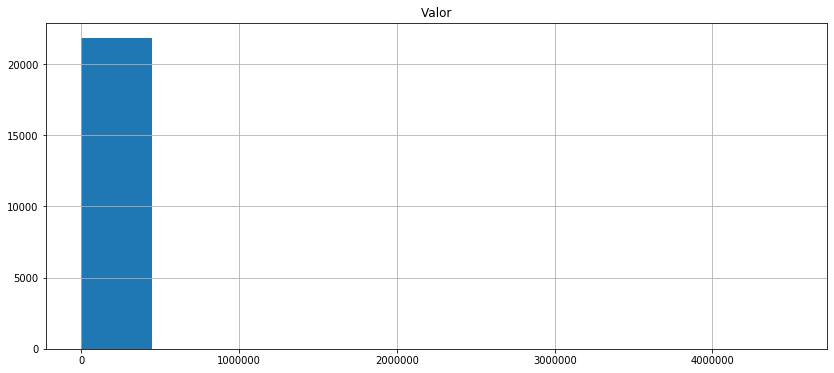

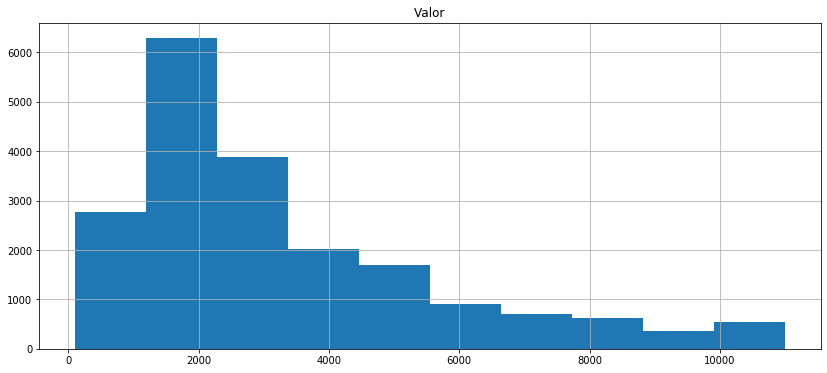

In [73]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

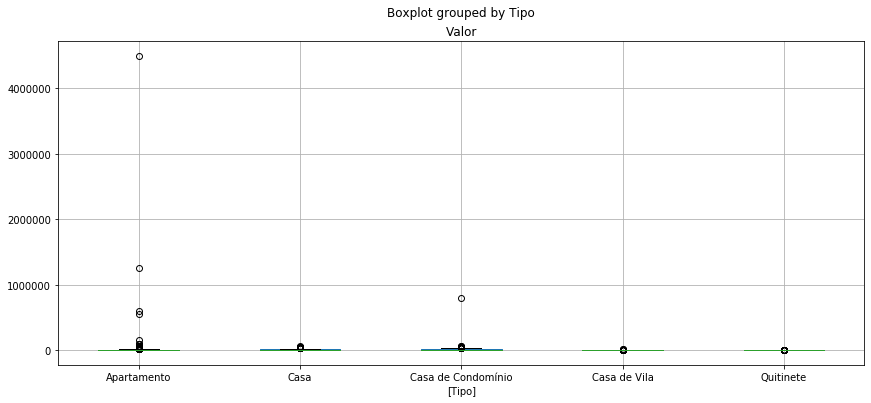

In [74]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [75]:
# Agrupando dados por tipo e valor
grupo_tipo = dados.groupby('Tipo')['Valor']
grupo_tipo.groups

{'Apartamento': Int64Index([    2,     3,     4,     7,     8,     9,    11,    13,    14,
                15,
             ...
             21813, 21814, 21816, 21817, 21818, 21819, 21821, 21823, 21824,
             21825],
            dtype='int64', length=18780),
 'Casa': Int64Index([    1,    22,    54,    57,    96,   100,   144,   160,   180,
               238,
             ...
             21582, 21606, 21614, 21667, 21672, 21699, 21756, 21781, 21793,
             21804],
            dtype='int64', length=965),
 'Casa de Condomínio': Int64Index([    5,     6,    12,    16,    42,    58,   166,   168,   183,
               207,
             ...
             21709, 21711, 21719, 21752, 21763, 21764, 21782, 21791, 21801,
             21820],
            dtype='int64', length=996),
 'Casa de Vila': Int64Index([   81,   212,   220,   303,   332,   697,   822,   844,   918,
              1012,
             ...
             21184, 21189, 21253, 21325, 21353, 21366, 21588, 21635, 21716

In [76]:
# padrão estatístico para definir os registros com desvio de valor (por grupo)
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [77]:
Q1

Tipo
Apartamento           1700.0
Casa                  1100.0
Casa de Condomínio    4000.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [78]:
Q3

Tipo
Apartamento            5000.0
Casa                   9800.0
Casa de Condomínio    15250.0
Casa de Vila           1800.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [79]:
IIQ 

Tipo
Apartamento            3300.0
Casa                   8700.0
Casa de Condomínio    11250.0
Casa de Vila           1050.0
Quitinete               600.0
Name: Valor, dtype: float64

In [80]:
limite_inferior

Tipo
Apartamento           -3250.0
Casa                 -11950.0
Casa de Condomínio   -12875.0
Casa de Vila           -825.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [81]:
limite_superior

Tipo
Apartamento            9950.0
Casa                  22850.0
Casa de Condomínio    32125.0
Casa de Vila           3375.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [82]:
# Limpando os dados de acordo com os limites/tipos
dados_new = pd.DataFrame()  #cria dataframe em branco
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

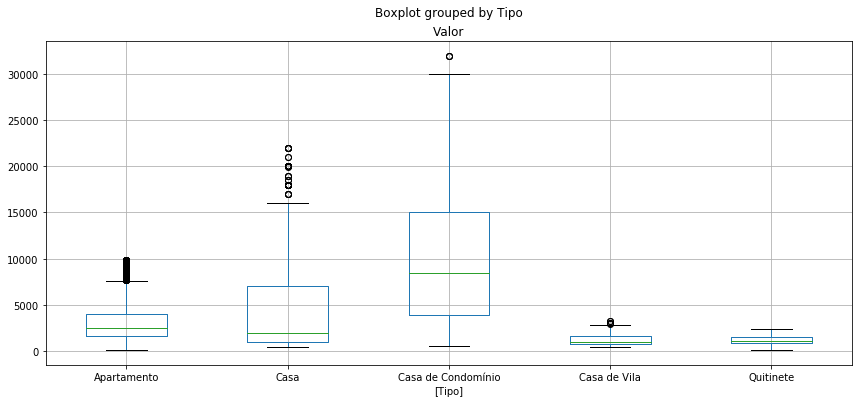

In [83]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [84]:
#Salvando dados em um novo arquivo
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index = False)

## Gerando algumas visões (gráficos)

In [85]:
#cabeçalho matplotlib
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15,8))

In [86]:
dados_graf = pd.read_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';')

In [87]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado,Padrão
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento,Padrão
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa,Médio
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento,Padrão
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento,Padrão
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento,Padrão


In [88]:
# definindo area do gráfico
area = plt.figure()   

<Figure size 1080x576 with 0 Axes>

In [89]:
# definindo posição de cada gráfico (visão com 4 gráficos)
g1 = area.add_subplot(2, 2, 1)
g2 = area.add_subplot(2, 2, 2)
g3 = area.add_subplot(2, 2, 3)
g4 = area.add_subplot(2, 2, 4)

In [90]:
#gráfico de dispersão (scatter)
g1.scatter(dados_graf.Valor, dados_graf.Area)
g1.set_title('Valor X Área')

#gráfico Histograma
g2.hist(dados_graf.Valor)
g2.set_title('Histograma')

#gráfico de linha por amostragem (100 casos)
dados_g3 = dados_graf.Valor.sample(100)
dados_g3.index = range(dados_g3.shape[0])  #ajustando o indice dos dados já que são 100 casos aleatórios
g3.plot(dados_g3)
g3.set_title('Amostra (Valor)')

#gráfico de barras
grupo = dados_graf.groupby('Tipo')['Valor']
label = grupo.mean().index    #rótulos
valores = grupo.mean().values
g4.bar(label, valores)
g4.set_title('Valor Médio por Tipo')

Text(0.5, 1.0, 'Valor Médio por Tipo')

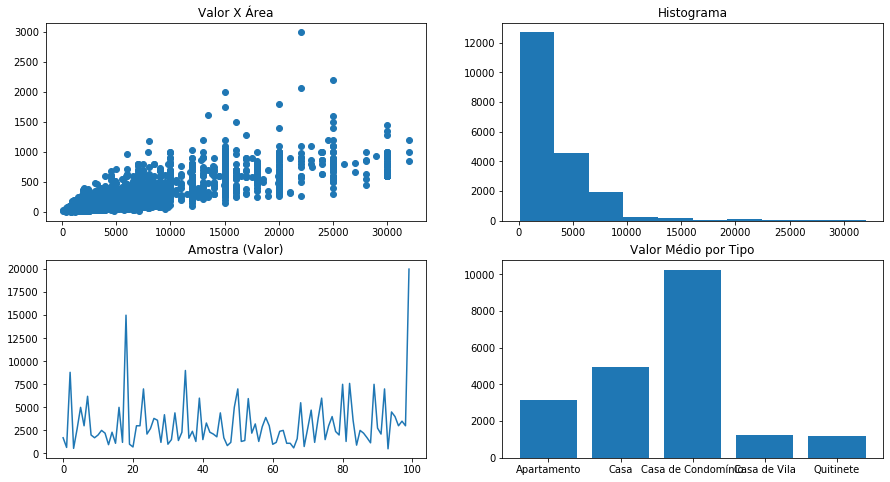

In [91]:
area

In [92]:
#salvando o gráfico como imagem
area.savefig('grafico.png', dpi = 300, bbox_inches = 'tight')  #tight remove bordas brancas

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

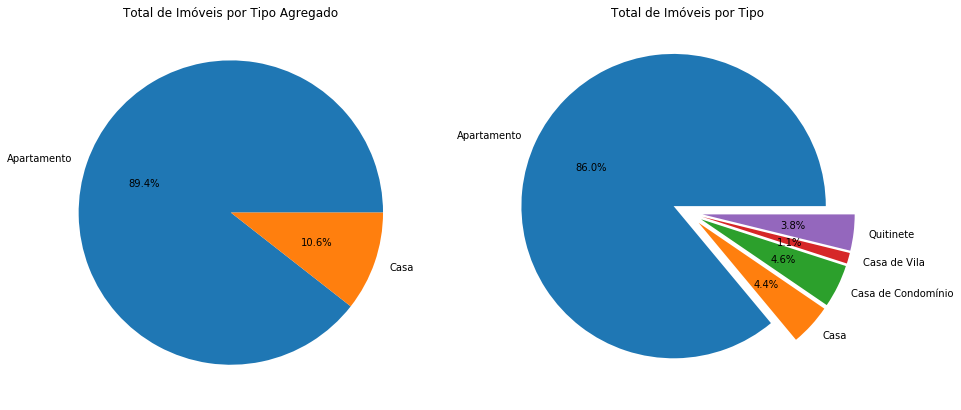

In [95]:
#gerando um último gráfico (pizza)
area_2 = plt.figure()
g1 = area_2.add_subplot(1, 2, 1)
g2 = area_2.add_subplot(1, 2, 2)
grupo1 = dados_graf.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels = label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')

grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels = label, autopct='%1.1f%%', explode = (.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')

<Figure size 1080x576 with 0 Axes>